In [32]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
file_path = '../DATA/diabetes.csv'

for dirname, _, filenames in os.walk(file_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))





*Exploratory Data Analysis:* 
- Data Cleaning/ formatting
- Removal of null celss
- Predictor Statistics
- visualization of metrics

In [33]:
df = pd.read_csv('../DATA/diabetes.csv')
df.head()
df.corr()['Outcome'] #other features correlation to Outcome

data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


*NN - Sequential Model Section*

In [34]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
X = scaler.fit_transform(X)
X.shape

(768, 8)

Train-TEST Splitting

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

Sequential Modelling using Keras and Tensor Flow

In [38]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [39]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.fit(X_train,y_train,batch_size=32,
          epochs=1000,
          validation_data=(X_test,y_test))

Now EDA for Logistic Regression and Naive-Bayes Models

Basic statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000

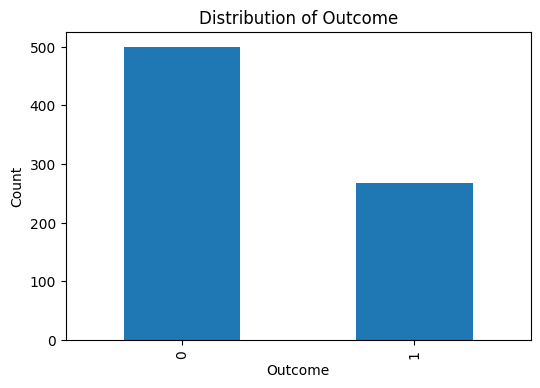

In [41]:
import matplotlib.pyplot as plt

# Basic statistics
print('Basic statistics:')
print(data.describe(), "\n")

# Check for missing values
print('Number of missing values:\n',data.isnull().sum())
# print(data.isnull().sum())

# Distribution of the 'Outcome'
plt.figure(figsize=(6,4))
data['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values with the mean
# Scale the data
  # The last column is the target
  # The rest are the features. Target column is not scaled (not imputed) because it contains categorical values
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
# data.head()
data.describe()
data, data.iloc[:, :-1], data.iloc[:, -1]


(     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
 1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
 2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
 3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
 4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
 ..           ...       ...            ...            ...       ...       ...   
 763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
 764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
 765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
 766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
 767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   
 
      DiabetesPedigreeFunc

In [43]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, logreg_pred))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_pred))

Logistic Regression Accuracy: 0.7401574803149606
Naive Bayes Accuracy: 0.7362204724409449


In [45]:
# Viewing the coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': logreg.coef_[0]})
print(feature_importance.sort_values(by='Importance', ascending=False))

                    Feature  Importance
1                   Glucose    1.125116
5                       BMI    0.836656
7                       Age    0.409354
0               Pregnancies    0.194350
6  DiabetesPedigreeFunction    0.119838
3             SkinThickness   -0.013591
4                   Insulin   -0.107667
2             BloodPressure   -0.191970
